## Step 1: Importing neccessary pacakages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('fast')
sns.set_style('darkgrid')

## Step 2: Load the data

In [4]:
Loan_train = pd.read_csv(r'LoanPred_train.csv')

## Step 3: Analyzing the Data Frame

In [5]:
Loan_train.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
Loan_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
Loan_train.shape

(614, 13)

In [8]:
Loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
Loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
# Check for missing values

Loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

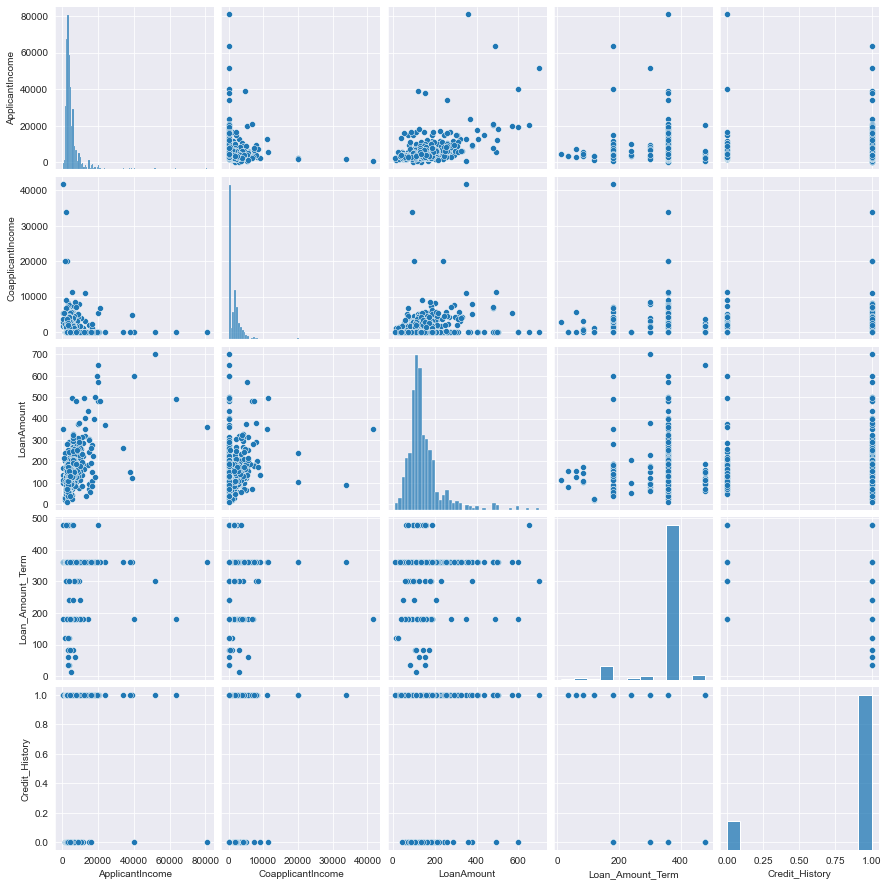

In [21]:
sns.pairplot(Loan_train)

## Step 4: Numerical variable analysis

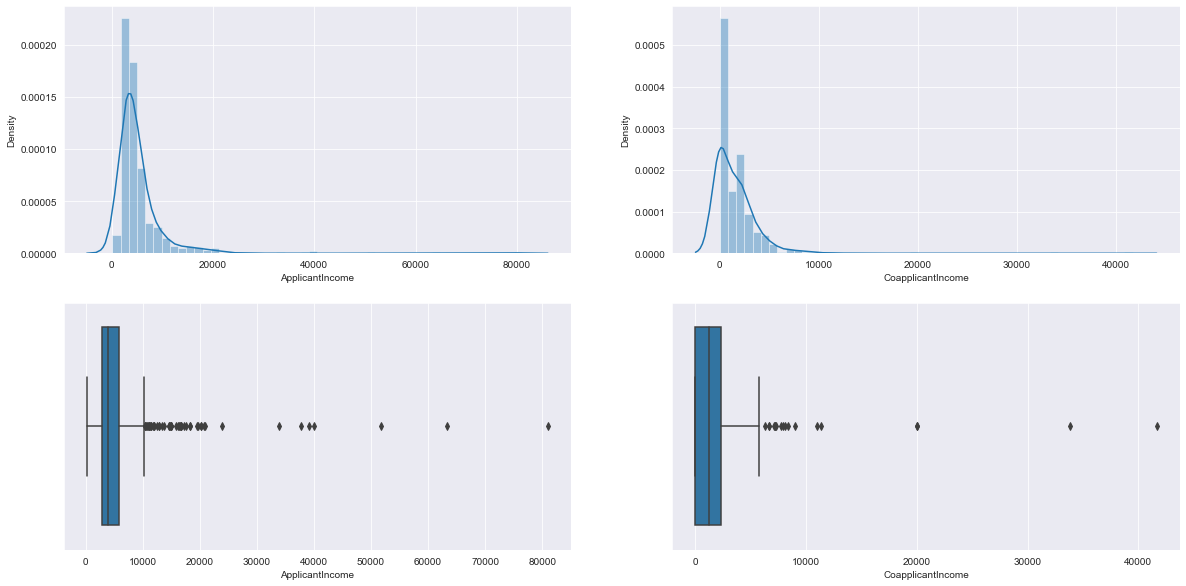

In [23]:
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.distplot(Loan_train.ApplicantIncome)

plt.subplot(222)
sns.distplot(Loan_train.CoapplicantIncome)

plt.subplot(223)
sns.boxplot(Loan_train.ApplicantIncome)

plt.subplot(224)
sns.boxplot(Loan_train.CoapplicantIncome)


plt.show();

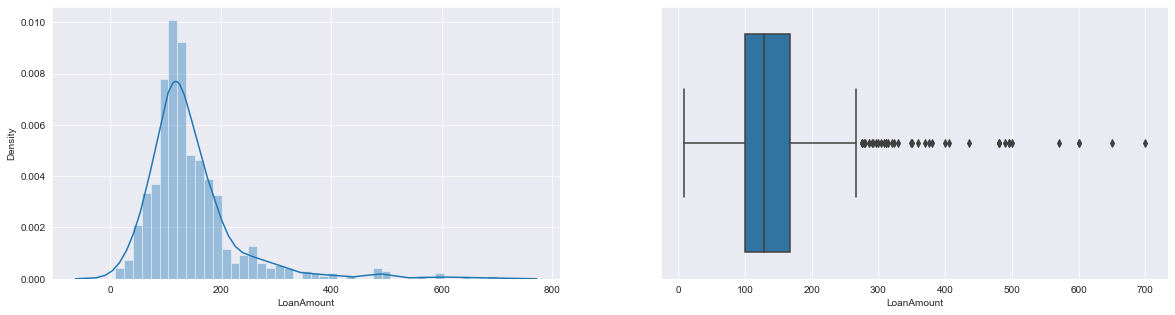

In [24]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(Loan_train[Loan_train.notnull()['LoanAmount']]['LoanAmount'])

plt.subplot(122)
sns.boxplot(Loan_train.LoanAmount)


plt.show();

In [25]:
Loan_train.LoanAmount.mean()

146.41216216216216

In [26]:
# Gender Married Dependents Education Self_Employed

In [27]:
Loan_train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

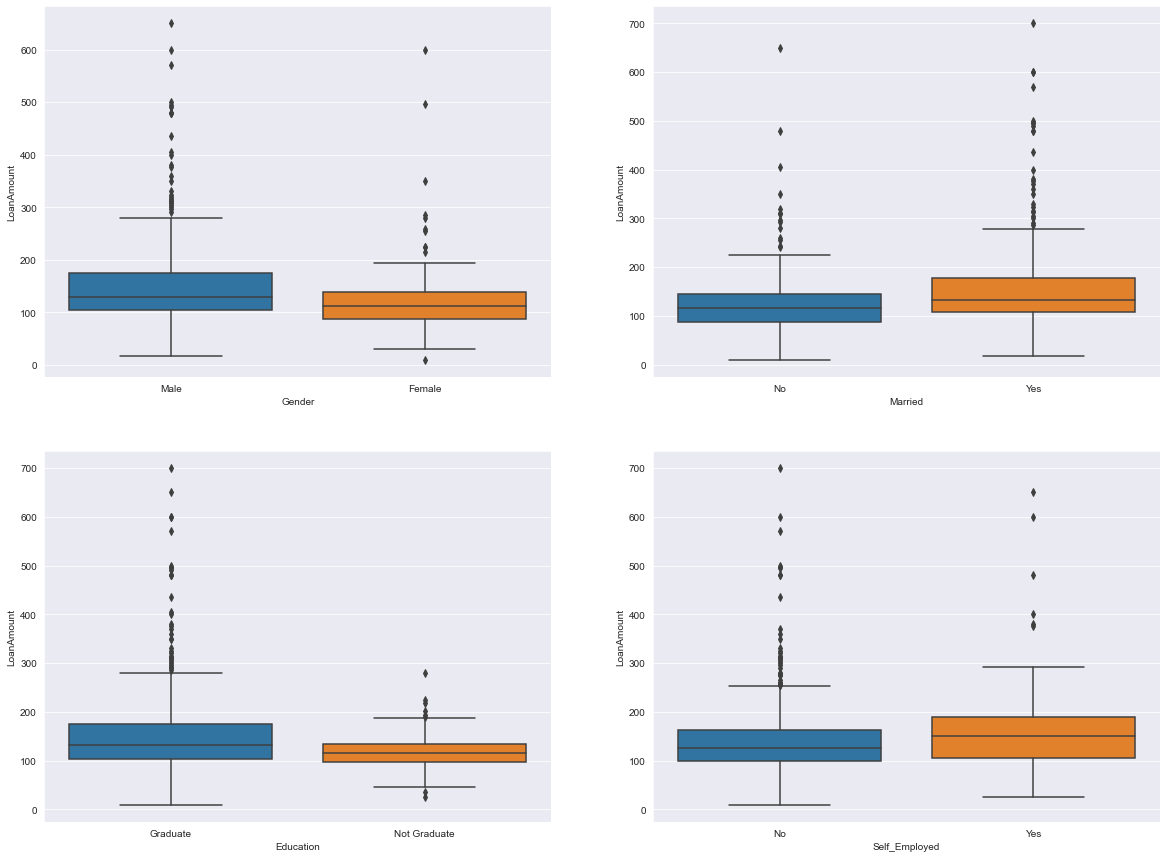

In [28]:
plt.figure(figsize=(20,15))

plt.subplot(221)
sns.boxplot(x= Loan_train.Gender, y= Loan_train.LoanAmount)

plt.subplot(222)
sns.boxplot(x= Loan_train.Married, y= Loan_train.LoanAmount);

plt.subplot(223)
sns.boxplot(x= Loan_train.Education, y= Loan_train.LoanAmount);

plt.subplot(224)
sns.boxplot(x= Loan_train.Self_Employed, y= Loan_train.LoanAmount);

plt.show();

In [29]:
Loan_train['LoanAmount'].fillna(Loan_train.LoanAmount.mean(),inplace = True)

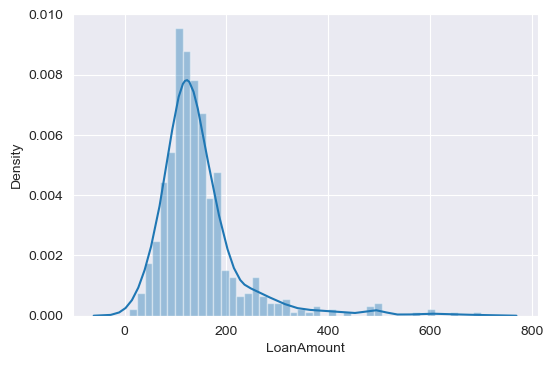

In [30]:
# Check the Loan amount distribution after filling the missing values

plt.figure(dpi = 100)
sns.distplot(Loan_train.LoanAmount);

In [31]:
np.percentile(Loan_train.LoanAmount, [25,75])

array([100.25, 164.75])

In [32]:
Q1, Q3 = np.percentile(Loan_train.LoanAmount, [25,75])

In [33]:
Q1; Q3

164.75

In [34]:
IQR = Q3 - Q1; IQR

64.5

In [35]:
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

In [36]:
Loan_train.LoanAmount.std()

84.0374676831965

In [37]:
Loan_train.LoanAmount.mean() + 2*Loan_train.LoanAmount.std()

314.4870975285551

In [38]:
Loan_train.LoanAmount.mean() - 2*Loan_train.LoanAmount.std()

-21.66277320423086

In [39]:
Loan_train[(Loan_train.LoanAmount < 3.5) | (Loan_train.LoanAmount > 261.5)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N


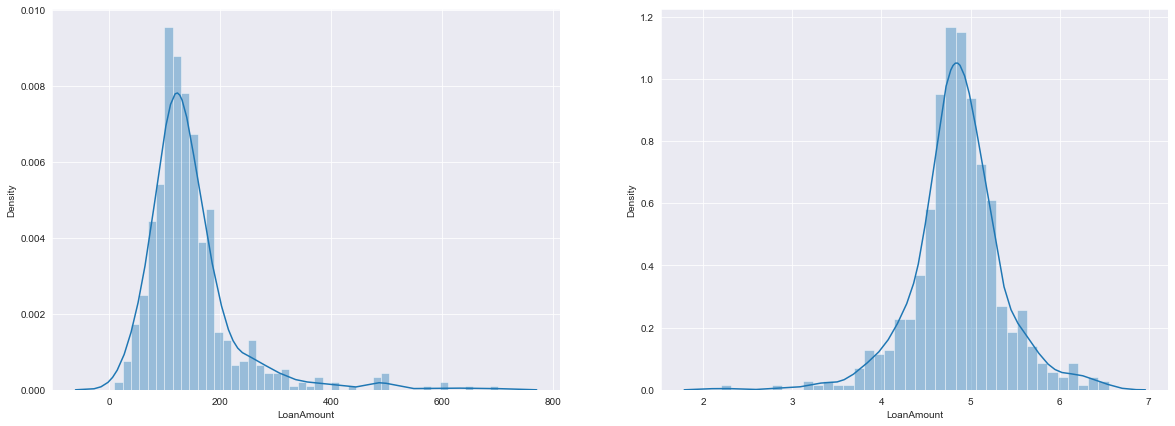

In [40]:
# transforming the Loan Amount column - Apply log


# plt.figure(dpi = 200)
plt.figure(figsize=(20,7))

plt.subplot(121)
sns.distplot(Loan_train.LoanAmount)

plt.subplot(122)
sns.distplot(np.log(Loan_train.LoanAmount))

plt.show();

In [41]:
Loan_train['LoanAmount_log'] = np.log(Loan_train.LoanAmount)

In [42]:
# Applicant Income & Coapplicant Income

In [43]:
Loan_train['TotalIncome'] = Loan_train.ApplicantIncome + Loan_train.CoapplicantIncome

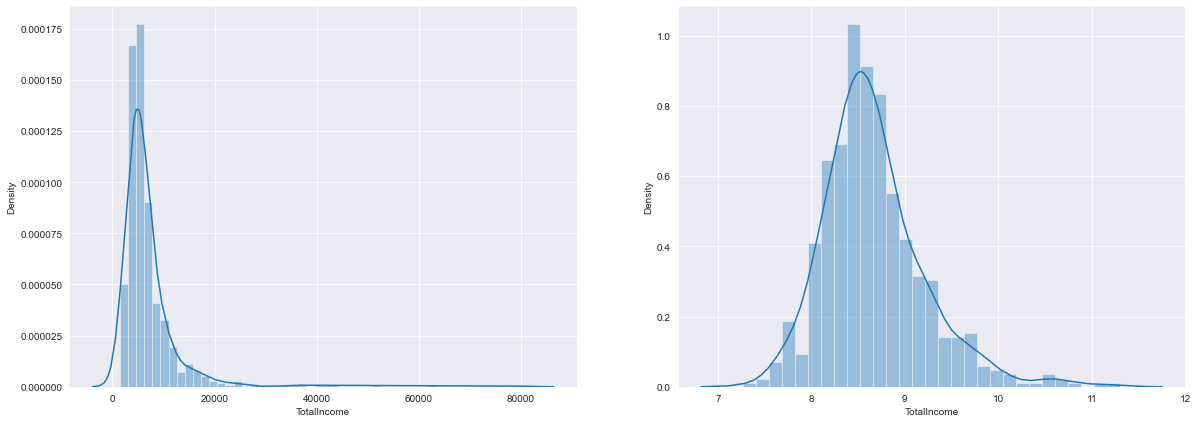

In [44]:
plt.figure(figsize=(20,7))

plt.subplot(121)
sns.distplot(Loan_train.TotalIncome)

plt.subplot(122)
sns.distplot(np.log(Loan_train.TotalIncome))

plt.show();

In [45]:
Loan_train['TotalIncome_log'] = np.log(Loan_train.TotalIncome)

In [46]:
# dataframe after numerical varlable analysis

Loan_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819


## Step 5: Categorical variable analysis

In [47]:
Loan_train.dtypes.index

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [48]:
Loan_train.dtypes.values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64')], dtype=object)

In [102]:
print(Loan_train.Gender.value_counts())
print(Loan_train.Married.value_counts())
print(Loan_train.Dependents.value_counts())
print(Loan_train.Education.value_counts())
print(Loan_train.Self_Employed.value_counts())
print(Loan_train.Credit_History.value_counts())
print(Loan_train.Property_Area.value_counts())
print(Loan_train.Loan_Status.value_counts())

1    502
0    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
0    480
1    134
Name: Education, dtype: int64
0    532
1     82
Name: Self_Employed, dtype: int64
1.0    525
0.0     89
Name: Credit_History, dtype: int64
1    233
2    202
0    179
Name: Property_Area, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64


<AxesSubplot:>

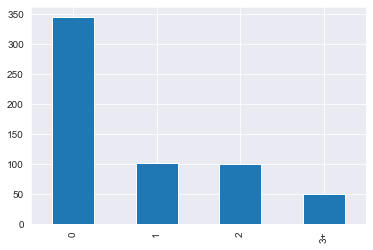

In [50]:
Loan_train.Dependents.value_counts().plot(kind='bar')

In [51]:
pd.crosstab(Loan_train.Education, Loan_train.Gender)

Gender,Female,Male
Education,,
Graduate,92,376
Not Graduate,20,113


<AxesSubplot:xlabel='Education'>

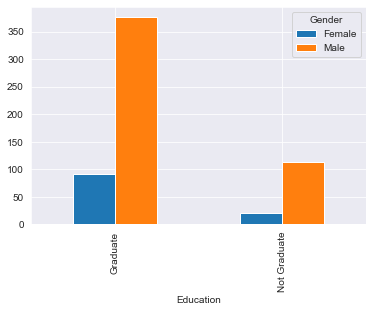

In [52]:
pd.crosstab(Loan_train.Education, Loan_train.Gender).plot(kind = 'bar')

<AxesSubplot:xlabel='Education'>

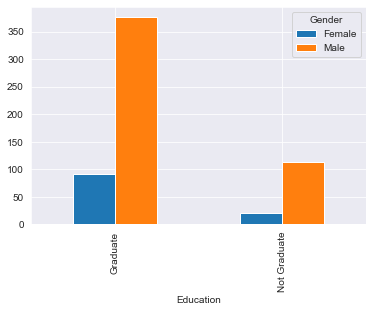

In [53]:
pd.crosstab(Loan_train.Education, Loan_train.Gender).plot(kind = 'bar')

In [54]:
pd.crosstab([Loan_train.Education, Loan_train.Gender], Loan_train.Loan_Status)

Loan_Status            N    Y
Education    Gender          
Graduate     Female   31   61
             Male    105  271
Not Graduate Female    6   14
             Male     45   68

<AxesSubplot:xlabel='Education,Gender'>

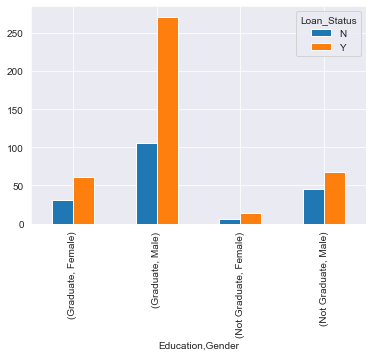

In [55]:
pd.crosstab([Loan_train.Education, Loan_train.Gender], Loan_train.Loan_Status).plot(kind = 'bar')

<AxesSubplot:xlabel='Education,Gender'>

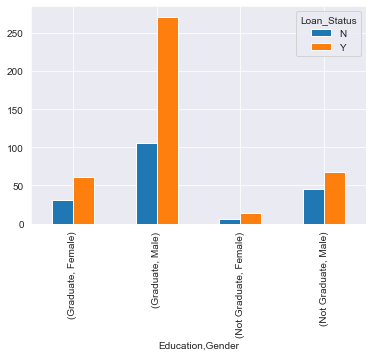

In [56]:
pd.crosstab([Loan_train.Education, Loan_train.Gender], Loan_train.Loan_Status).plot(kind = 'bar')

In [57]:
# Handle missing values

Loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [58]:
missing_cat_cols = ['Gender', 'Married','Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

In [59]:
Loan_train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [60]:
Loan_train.Gender.mode()[0]

'Male'

In [61]:
for col_name in missing_cat_cols:
    Loan_train[col_name].fillna(Loan_train[col_name].mode()[0], inplace=True)

In [62]:
Loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [63]:
Loan_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819


In [64]:
Loan_train_bak = Loan_train.copy()

In [65]:
# Encode the Categorical columns

encode_cols = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status' ]

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in encode_cols:
    Loan_train[x] = le.fit_transform(Loan_train[x])

In [67]:
# dataframe after Categorical analysis

Loan_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1,5.587249,9613.0,9.170872
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1,4.553877,3849.0,8.255569
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0,5.062595,5540.0,8.619750
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1,5.123964,5532.0,8.618305
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0,5.855072,23809.0,10.077819


## Step 6: Model Building

In [68]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [69]:
Loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [70]:
feature_cols = ['Gender', 'Married', 'Dependents', 'Education',
                   'Self_Employed','Loan_Amount_Term', 'Credit_History', 
                    'Property_Area','LoanAmount_log','TotalIncome_log']

In [71]:
X = Loan_train[feature_cols]
y = Loan_train.Loan_Status

In [72]:
DT_model = DecisionTreeClassifier()

In [73]:
DT_model.fit(X,y)

DecisionTreeClassifier()

In [74]:
pred = DT_model.predict(X)

In [75]:
accuracy_score(y, pred)

1.0

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [77]:
X_train.shape
X_test.shape

(93, 10)

In [78]:
DT_model1 = DecisionTreeClassifier()

In [79]:
DT_model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
pred_X_train = DT_model1.predict(X_train)

In [81]:
accuracy_score(y_train, pred_X_train)

1.0

In [82]:
pred_X_test = DT_model1.predict(X_test)

In [83]:
accuracy_score(y_test, pred_X_test)

0.6989247311827957

## Step 7: Model tuning - Feature selection

In [84]:
#RFE Recursive Feature Elimination

from sklearn.feature_selection import RFE

feature_cols = ['Gender', 'Married', 'Dependents', 'Education',
                   'Self_Employed','Loan_Amount_Term', 'Credit_History', 
                    'Property_Area','LoanAmount_log','TotalIncome_log']

X = Loan_train[feature_cols]
y = Loan_train.Loan_Status

model = DecisionTreeClassifier()

rfe = RFE(model, 4)

fit = rfe.fit(X, y)

In [85]:
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

4
[False False  True False False False  True False  True  True]
[2 7 1 6 5 4 1 3 1 1]


In [86]:
for i, x in enumerate(fit.ranking_):
    if(x == 1):
        print(X.columns[i])

Dependents
Credit_History
LoanAmount_log
TotalIncome_log


In [87]:
# Create a new DT model with selected features

feature_cols = ['Dependents','Credit_History', 'LoanAmount_log','TotalIncome_log']

X = Loan_train[feature_cols]
y = Loan_train.Loan_Status

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [89]:
X_train.shape
X_test.shape

(93, 4)

In [90]:
DT_model2 = DecisionTreeClassifier()

In [91]:
DT_model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
pred_X_train = DT_model2.predict(X_train)

In [93]:
accuracy_score(y_train, pred_X_train)

1.0

In [94]:
pred_X_test = DT_model2.predict(X_test)

In [95]:
accuracy_score(y_test, pred_X_test)

0.6236559139784946

## Decision Tree


You need to install pydotplus and graphviz. These can be installed with your package manager and pip. Graphviz is a tool for drawing graphics using dot files. Pydotplus is a module to Graphviz’s Dot language.


In [96]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [97]:
import os
os.getcwd()

'C:\\Users\\dell\\OneDrive\\Desktop\\hotels\\ML\\1138841-decisiontree'

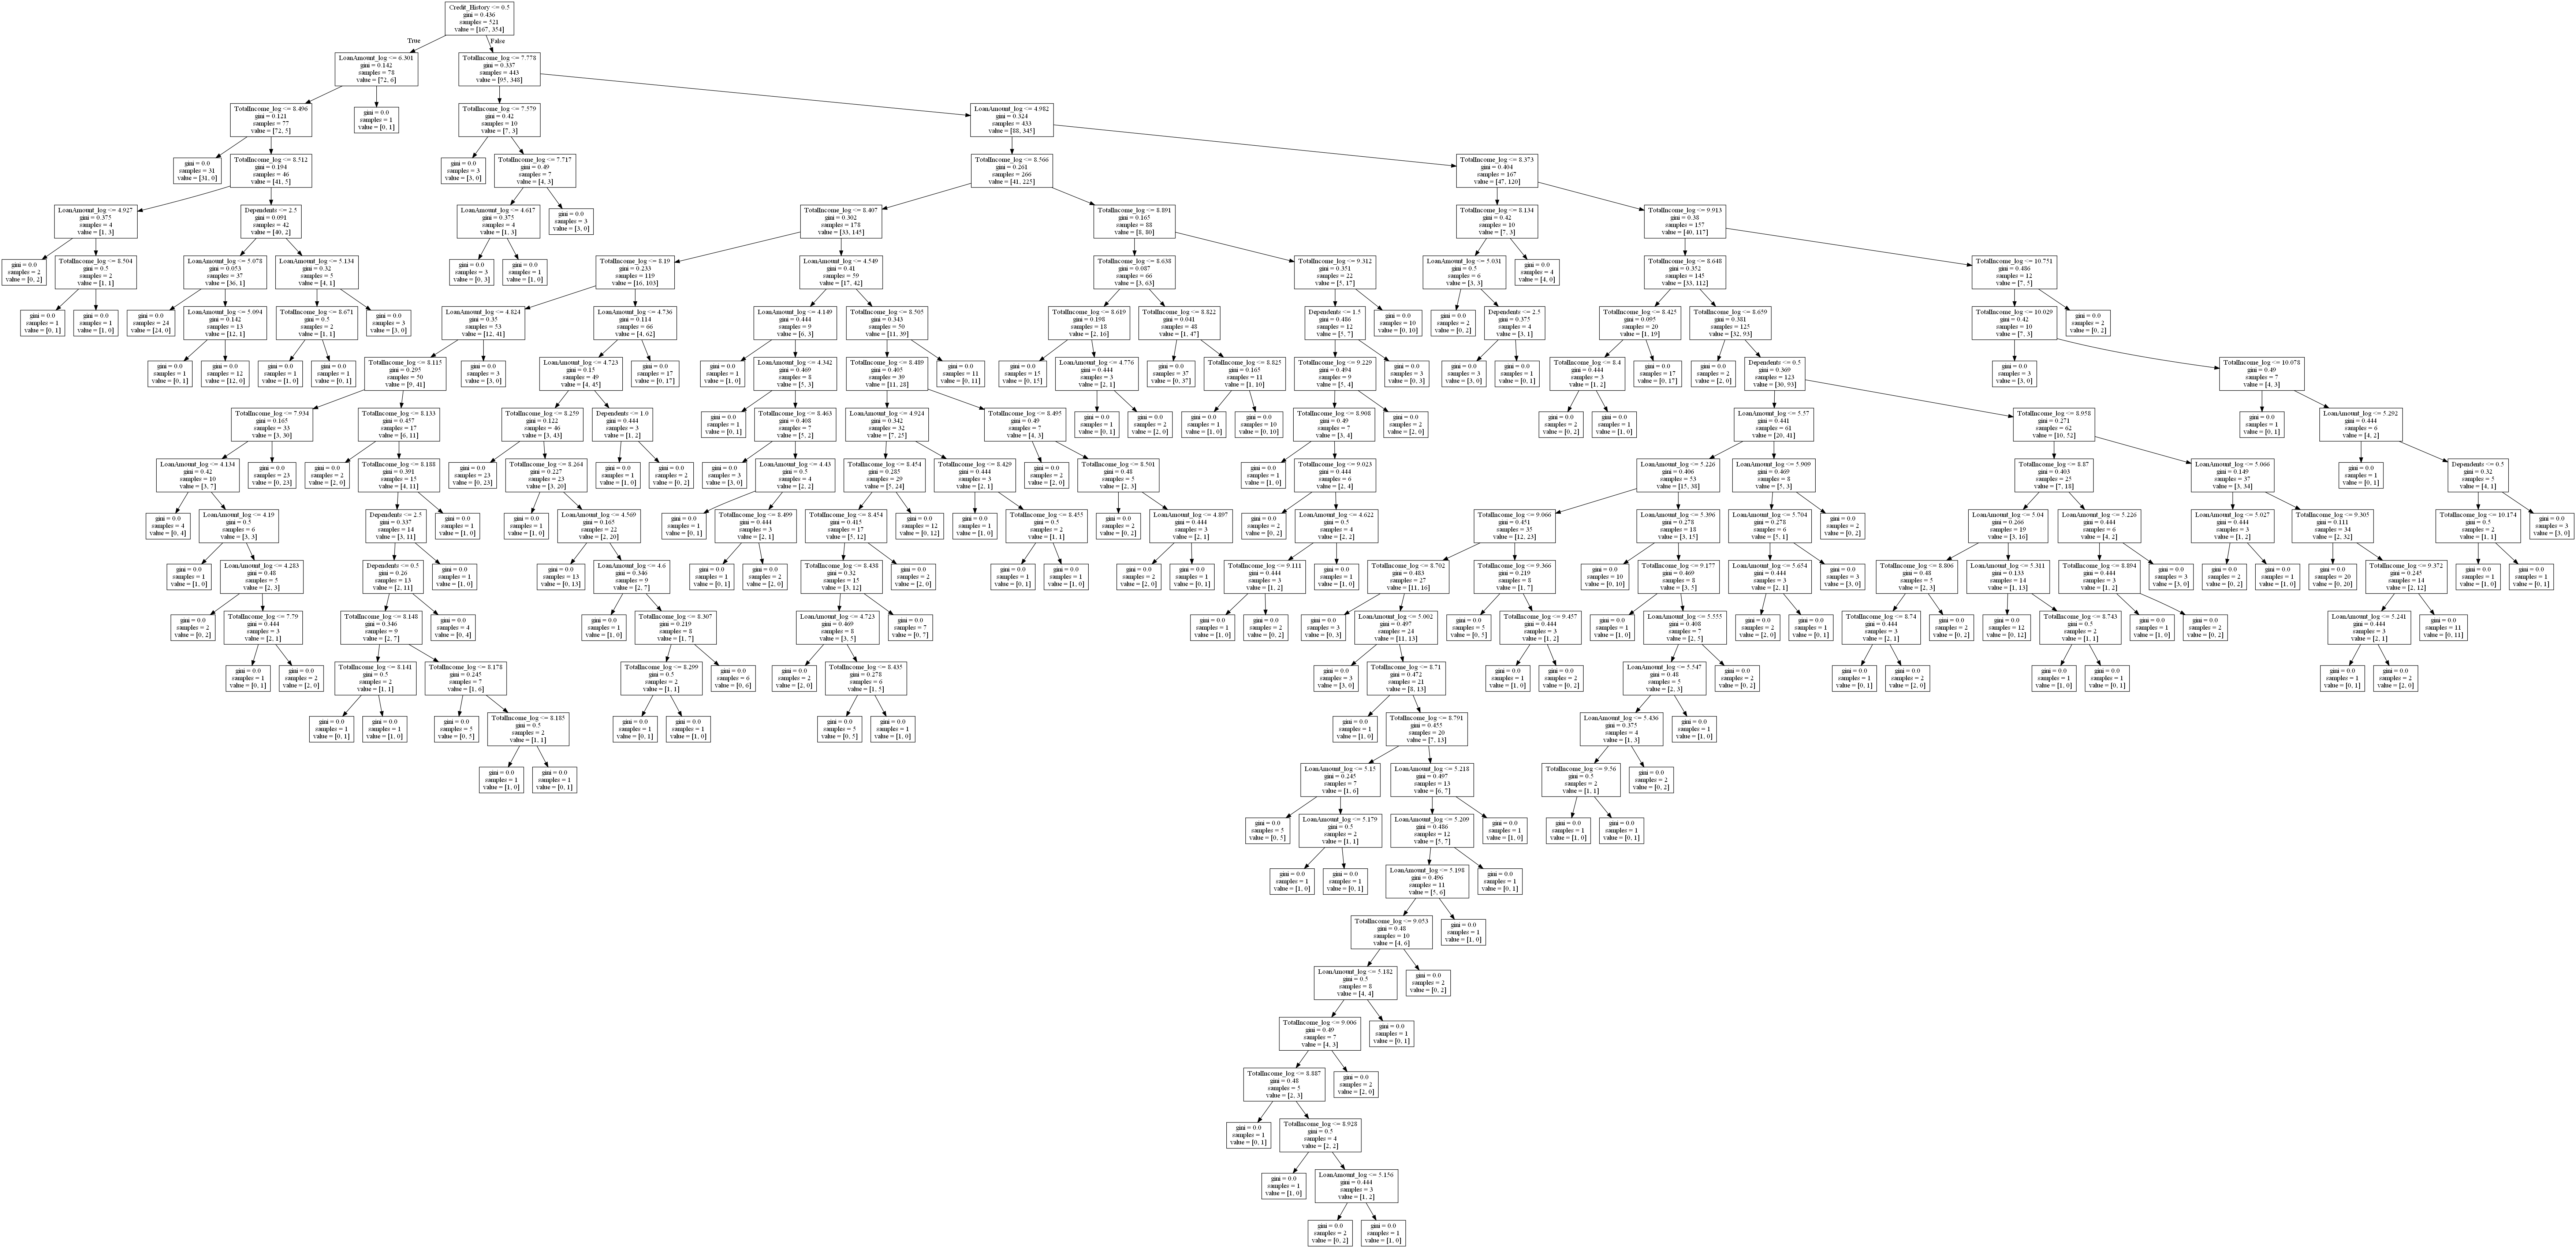

In [98]:
# Create DOT data

#export_graphviz(DT_model2, out_file='tree_bw.dot', 
                                #feature_names=feature_cols2)

dot_data = export_graphviz(DT_model2, out_file=None, 
                                feature_names=feature_cols)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

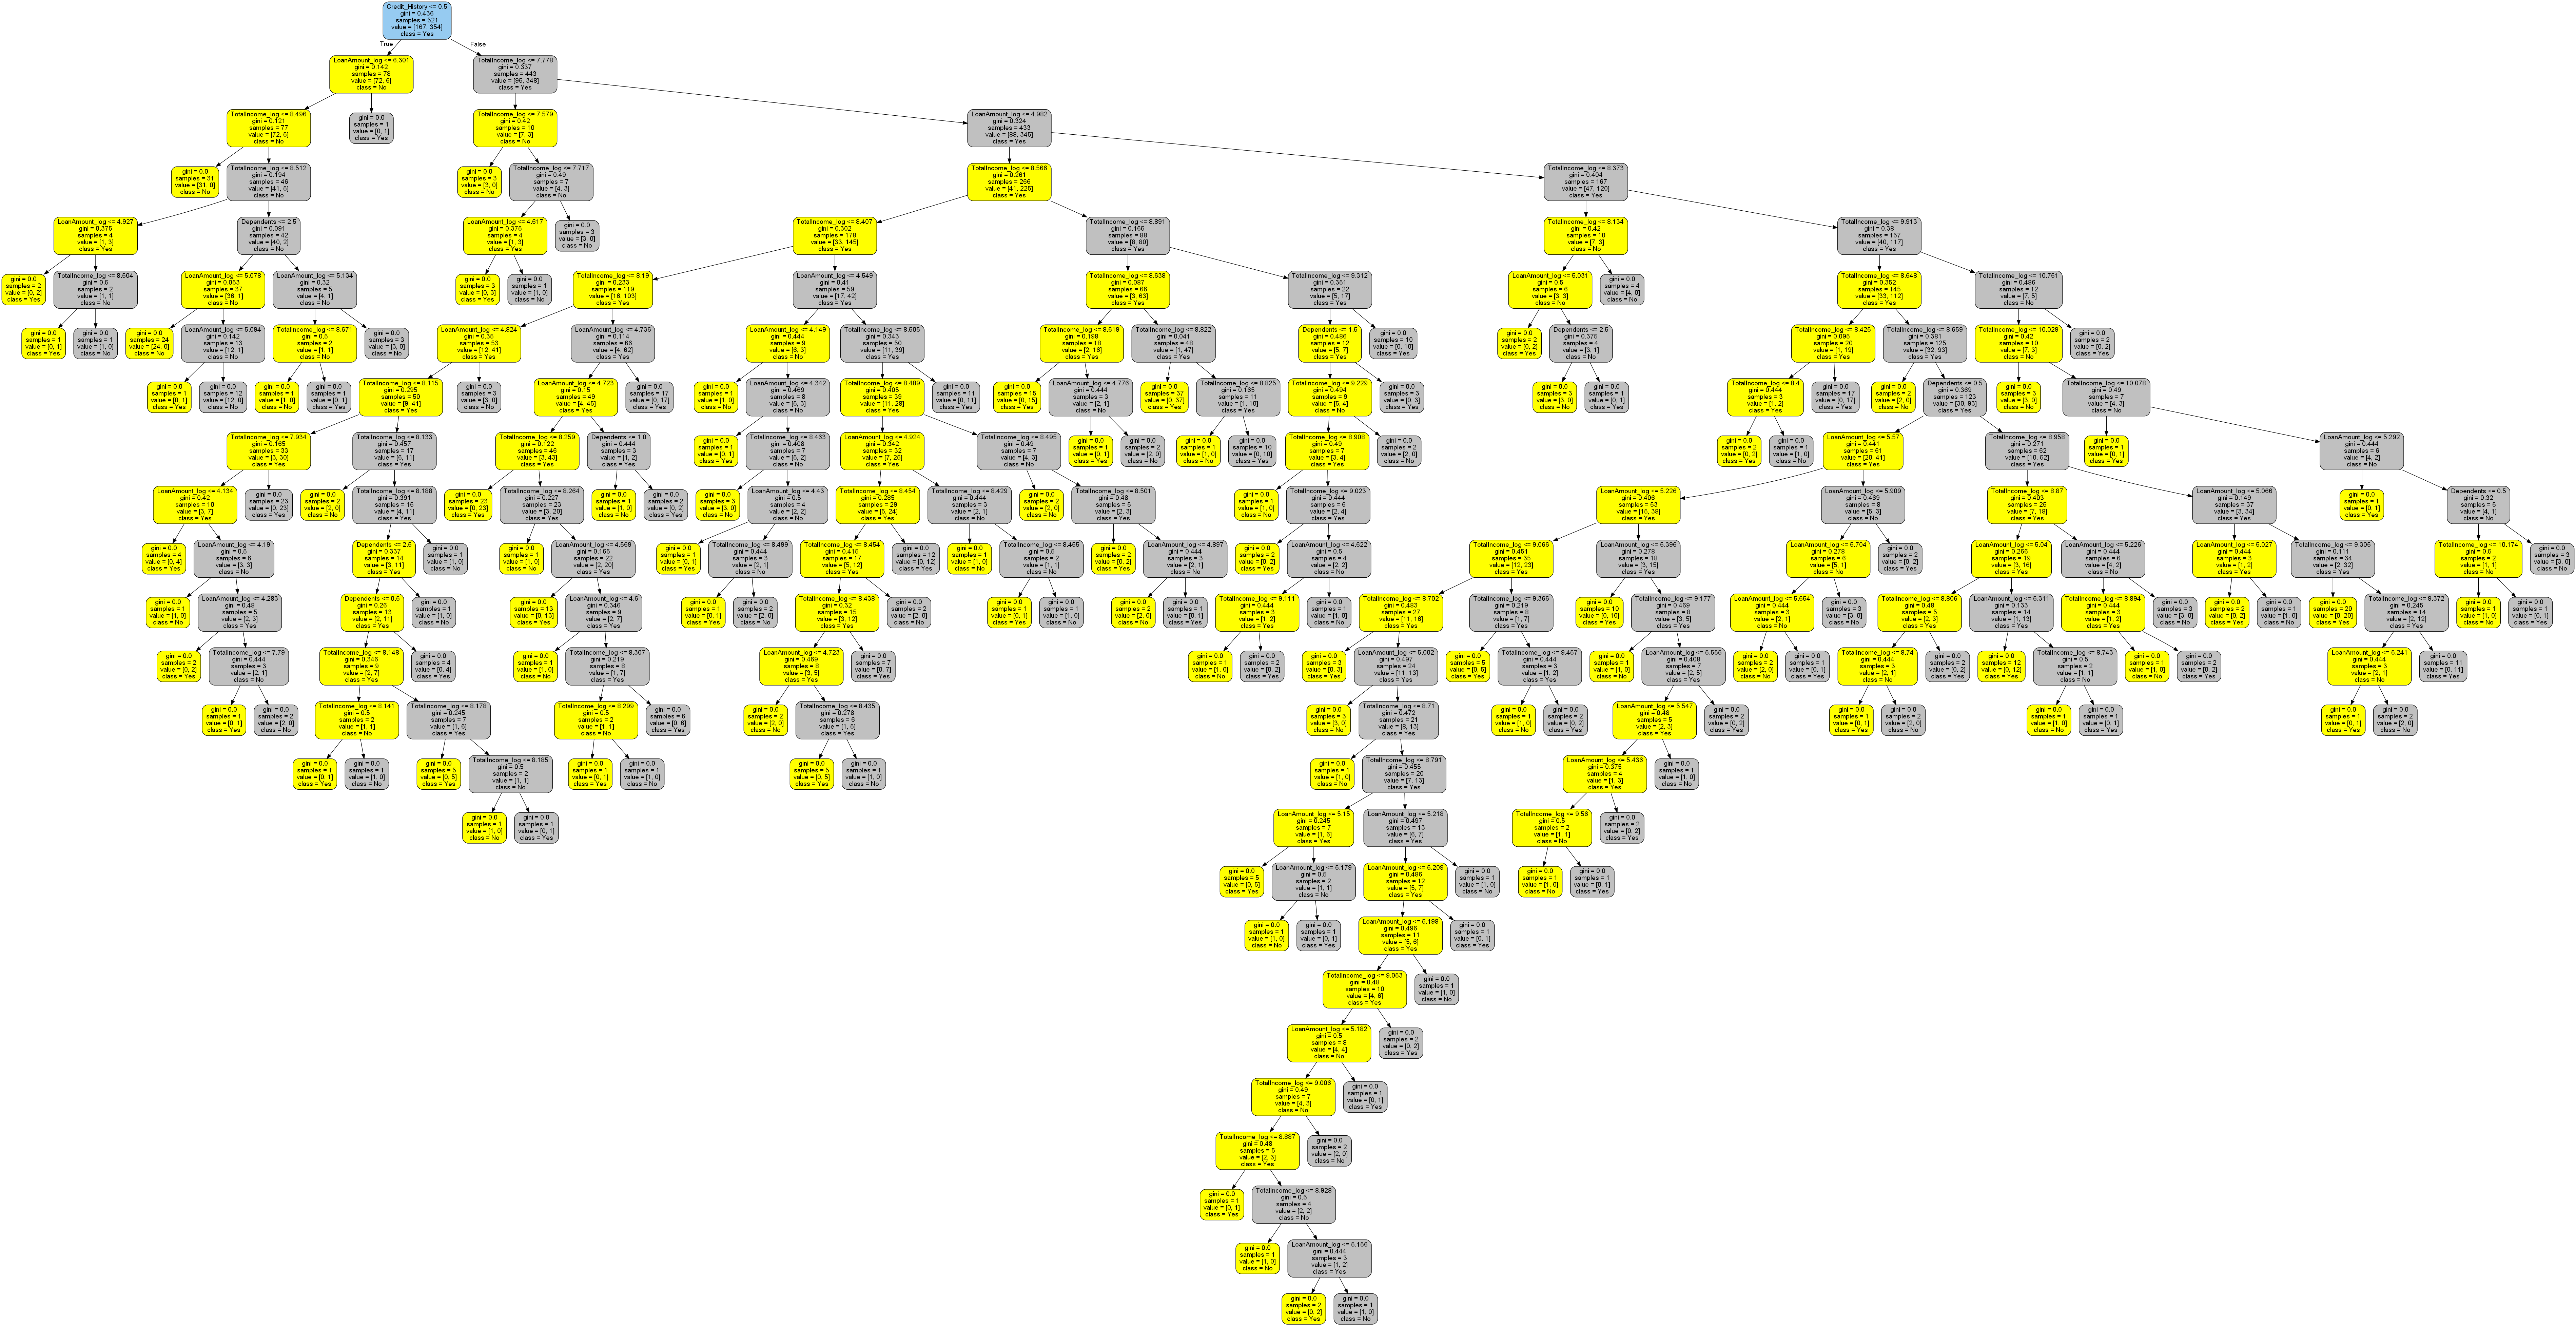

True

In [106]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import collections

# Create DOT data
#export_graphviz(DT_model2, out_file='tree_color.dot', 
                                #feature_names=feature_cols2,filled=True,\
                           #rounded=True)

dot_data = export_graphviz(DT_model2, out_file=None, 
                                feature_names=feature_cols,filled=True,\
                           rounded=True, class_names=['No','Yes'], )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

colors = ('yellow', 'grey')

edges = collections.defaultdict(list)


for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
# Show graph
Image(graph.create_png())
graph.write_png('tree.png')

DecisionTreeClassifier(criterion='entropy')

Depth of the tree 22
--------------------------------------------------
Feature importances with Entropy


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Support')

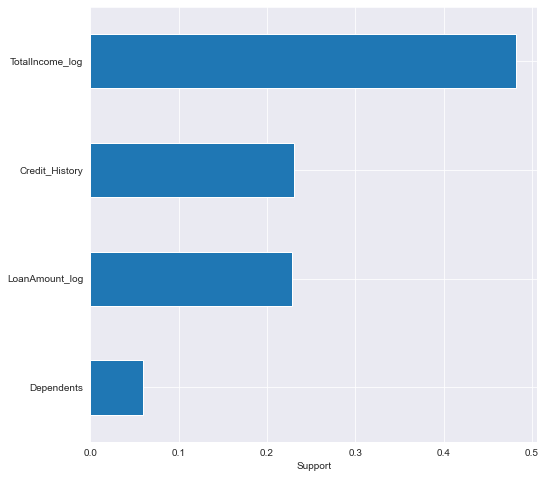

--------------------------------------------------
Training accuracy 1.0
Testing accuracy 0.7204301075268817


In [108]:

model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=None)
model_entropy.fit(X_train,y_train)

print('Depth of the tree',model_entropy.tree_.max_depth)
print('-'*50)
print('Feature importances with Entropy')
imp_features= model_entropy.tree_.compute_feature_importances()
plt.figure(figsize=(8,8))
pd.Series(imp_features,index=X_train.columns).sort_values().plot(kind='barh')
plt.xlabel('Support')
plt.show()
print('-'*50)
print("Training accuracy",model_entropy.score(X_train,y_train))
print("Testing accuracy",model_entropy.score(X_test,y_test))

In [193]:
train_acc=[]
test_acc=[]
for i in range(2,17):
    model_gini_prune=DecisionTreeClassifier(max_depth=i)
    model_gini_prune.fit(X_train,y_train)
    train_a=model_gini_prune.score(X_train,y_train)
    test_a=model_gini_prune.score(X_test,y_test)
    train_acc.append(train_a)
    test_acc.append(test_a)
    


DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier(max_depth=4)

DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=6)

DecisionTreeClassifier(max_depth=7)

DecisionTreeClassifier(max_depth=8)

DecisionTreeClassifier(max_depth=9)

DecisionTreeClassifier(max_depth=10)

DecisionTreeClassifier(max_depth=11)

DecisionTreeClassifier(max_depth=12)

DecisionTreeClassifier(max_depth=13)

DecisionTreeClassifier(max_depth=14)

DecisionTreeClassifier(max_depth=15)

DecisionTreeClassifier(max_depth=16)

(Text(0.5, 0, 'Depth'), Text(0, 0.5, 'Score'))

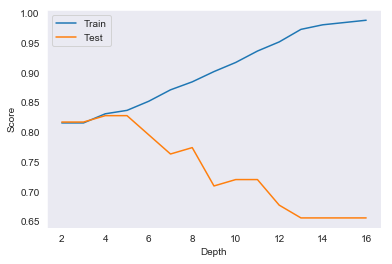

In [194]:
depth = np.arange(2,17)
plt.plot(depth,train_acc)
plt.plot(depth,test_acc)
plt.xlabel('Depth'),plt.ylabel('Score')
plt.legend(['Train','Test'])
plt.grid()
plt.show()

DecisionTreeClassifier(criterion='entropy', max_depth=2)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

DecisionTreeClassifier(criterion='entropy', max_depth=13)

DecisionTreeClassifier(criterion='entropy', max_depth=14)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

DecisionTreeClassifier(criterion='entropy', max_depth=16)

(Text(0.5, 0, 'Depth'), Text(0, 0.5, 'Score'))

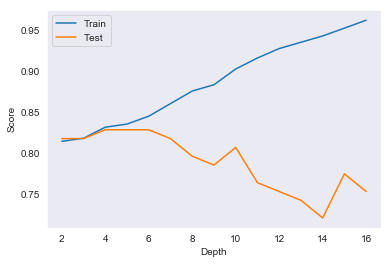

In [195]:
train_acc=[]
test_acc=[]
for i in range(2,17):
    model_gini_prune=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model_gini_prune.fit(X_train,y_train)
    train_a=model_gini_prune.score(X_train,y_train)
    test_a=model_gini_prune.score(X_test,y_test)
    train_acc.append(train_a)
    test_acc.append(test_a)
    
depth = np.arange(2,17)
plt.plot(depth,train_acc)
plt.plot(depth,test_acc)
plt.xlabel('Depth'),plt.ylabel('Score')
plt.legend(['Train','Test'])
plt.grid()
plt.show()